# Combining all requirements

This section combines all the requirements and plots them on a single plot. The feasible region under all the constraints is also highlighted. An initial estimate of wing and power loading is also provided towards the end of this section.

Below code snippet imports required packages and creates a grid of $W/S$ and $W/P$ values for computing various constraints:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# W/S and W/P values - sealevel at takeoff power
num_pts = 500
wing_loading = np.linspace(15, 50, num_pts) # lb/ft^2
power_loading = np.linspace(5, 20, num_pts) # lb/hp
X, Y = np.meshgrid(wing_loading, power_loading)

## Takeoff distance

Below code block computes takeoff distance requirement, refer [here](takeoff.ipynb) for further details.

In [2]:
s_tgr = 1500 # ft
sigma = 1 # since sealevel conditions
CL_max_to = 1.8

# coeff of quadratic eq
a = 0.009
b = 4.9
c = -s_tgr

# TOP solution
top_23 = (-b + np.sqrt(b**2 - 4*a*c)) / 2 / a # other solution will be negative

takeoff_req = X * Y / sigma / CL_max_to - top_23

## Landing distance

Below code snippet computes landing distance requirement, refer [here](landing.ipynb) for further details.

In [3]:
s_lgr = 1500 # ft
density_sea_level = 0.002387 # slugs/cu. ft
CL_max_L = 2.2 # assumed
wl_by_w_to = 0.975

# stall speed
v_sL = (s_lgr/0.265)**0.5 # in knots
v_sL = v_sL * 1.68781 # in ft/s

landing_req =  wl_by_w_to * X * 2 / density_sea_level / CL_max_L - v_sL**2

## Climb Gradient

Below code computes climb gradient requirement, refer [here](climb.ipynb) for further details. Note that only OEI scenario is included since it is the driving constraint among all the climb requirements.

In [4]:
# Variables
cgr = 0.015
sigma = 0.858 # 5000 ft
CL = 1.3
CD0 = 0.028 + 0.005
e = 0.81
A = 8
n_p = 0.8
wcr_by_wto = 0.975
p5000_by_pTO = 0.834

CD = CD0 + CL**2/np.pi/A/e
L_by_D = CL / CD
cgrp_oei = ( cgr + L_by_D**(-1) ) / CL**0.5

cgr_oei_req = Y * 2 / p5000_by_pTO * X**0.5 * wcr_by_wto**1.5 - 18.97 * n_p * sigma**0.5 / cgrp_oei

## Cruise Speed

Below code block computes cruise speed requirement, refer [here](cruise.ipynb) for further details.

In [5]:
# Variables
ip = 1.4
sigma = 0.786
p8000_by_pTO = 0.758

cruise_speed_req = sigma * ip**3 * Y / p8000_by_pTO / 0.8 - X # 0.8 is for 80% power setting adjustment

## Final plot

Below code block plots all the requirements together and highlights the feasible region:

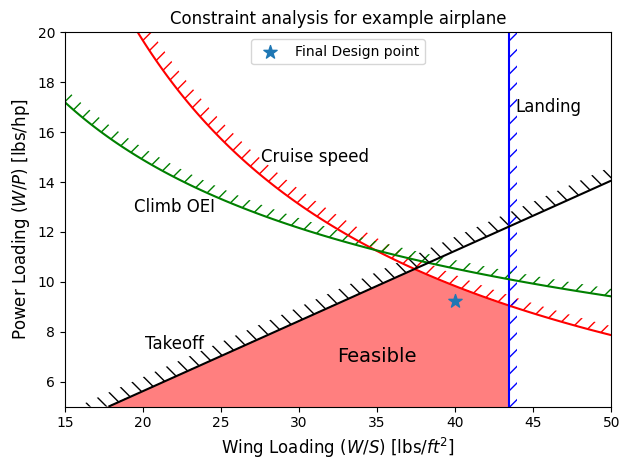

In [30]:
# Plotting
fs = 12 # fontsize
colors = ['r', 'b', 'g', 'k']

fig, ax = plt.subplots()

# Active constraint lines
cp = ax.contour(X, Y, takeoff_req, colors=colors[0], levels=[0])
mpl.rcParams['hatch.color'] = colors[0]
ax.contourf(X, Y, takeoff_req, levels=[0, 10], colors='none', hatches=['//'])

cp = ax.contour(X, Y, landing_req, colors=colors[1], levels=[0])
mpl.rcParams['hatch.color'] = colors[1]
ax.contourf(X, Y, landing_req, levels=[0, 200], colors='none', hatches=['//'])

cp = ax.contour(X, Y, cgr_oei_req, colors=colors[2], levels=[0])
mpl.rcParams['hatch.color'] = colors[2]
ax.contourf(X, Y, cgr_oei_req, levels=[0, 5], colors='none', hatches=['//'], alpha=0)

cp = ax.contour(X, Y, cruise_speed_req, colors=colors[3], levels=[0])
mpl.rcParams['hatch.color'] = colors[3]
ax.contourf(X, Y, cruise_speed_req, levels=[0, 2], colors='none', hatches=['\\\\'], alpha=0)

# Feasible region
feasbile_region = np.logical_and.reduce([takeoff_req <= 0, landing_req <= 0, cgr_oei_req <= 0, cruise_speed_req <= 0])
ax.contourf(wing_loading, power_loading, feasbile_region, colors="r", levels=[0.5,1], alpha=0.5)
ax.annotate("Feasible", (35,7), fontsize=14, va="center", ha="center")

# Annotation
ax.annotate("Takeoff", (22,7.5), ha="center", va="center", fontsize=fs)
ax.annotate("Landing", (46,17), ha="center", va="center", fontsize=fs)
ax.annotate("Climb OEI", (22,13), ha="center", va="center", fontsize=fs)
ax.annotate("Cruise speed", (31,15), ha="center", va="center", fontsize=fs)

# Design point
ax.scatter(40, 9.25, marker="*", s=100, label="Final Design point")

ax.legend(fontsize=fs-2, loc="upper center")
ax.set_xlabel("Wing Loading ($W/S$) [lbs/$ft^2$]", fontsize=fs)
ax.set_ylabel("Power Loading ($W/P$) [lbs/hp]", fontsize=fs)
ax.set_title("Constraint analysis for example airplane")
ax.tick_params(axis='both', labelsize=fs-2)
plt.tight_layout()

Based on the above plot, the initial estimates for $W/S$ and $W/P$ are selected as 40 lbs/$\text{ft}^2$ and 9.25 lbs/hp, respectively. Typically, the airplane turns out to be over-weight and under-powered as the design process evolves. Hence, larger values of $W/S$ and $W/P$ are desired within the feasible region. Refer to the lecture notes for more details.